In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [4]:
#t in seconds, U in Volts
df = pd.read_csv('in/zad2_bat_5.txt', sep='\t', decimal=',')
df

,t,U
0,0,3.645
1,1,3.634
2,2,3.624
3,3,3.619
4,4,3.613
...,...,...
614,14268,1.519
615,14298,1.514
616,14327,1.509
617,14357,1.504


$I = 162.74 \mu A$

$m = 2.06mg$

In [6]:
#convert t to h
df['t'] /= 3600

#convert I to mA
I = 162.74e-3

#convert mass to g
m = 2.06e-3

df['P'] = I*df['t']/m

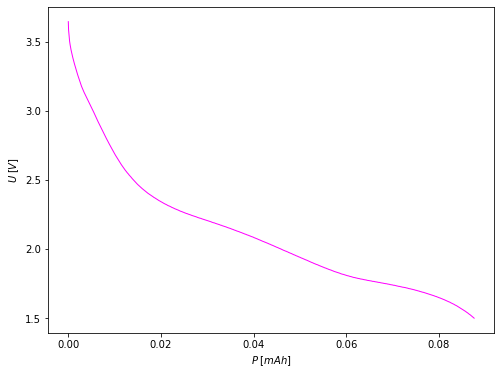

In [79]:

plt.figure(figsize=(8,6))

plt.plot(df['P'], df['U'], linewidth=1, color='magenta')

plt.ylabel(r"$U \; [V]$")
plt.xlabel(r"$P \; [mAh]$")

plt.show()
#TODO: podpisać wykres

In [45]:
df['dU'] = np.gradient(df['U'])
df['dP'] = np.gradient(df['P'])
df['dP/dU'] = df['dP']/df['dU']

1.7625 2.223 3.093


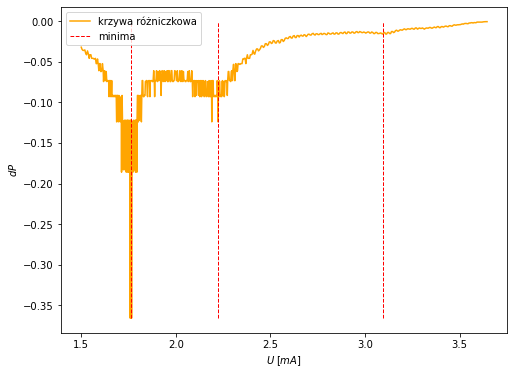

In [77]:

plt.figure(figsize=(8,6))

dotcolor = 'orange'
plt.plot(df['U'], df['dP/dU'], color=dotcolor, label = 'krzywa różniczkowa')

def find_min_in_range(df, U_min, U_max):
    df_working = df.iloc[np.where((df['U'] > U_min) & (df['U'] < U_max))]
    return (df_working['U'].loc[df_working['dP/dU'] == df_working['dP/dU'].min()]).mean()

min1 = find_min_in_range(df, 1.5,2)
min2 = find_min_in_range(df, 2.0,2.5)
min3 = find_min_in_range(df, 3.0,3.3)

plt.vlines(x=[min1,min2,min3], ymin = df['dP/dU'].min(), ymax=df['dP/dU'].max(), linestyles='--', color = 'red', linewidth = 1, label = 'minima')

print(min1, min2, min3)
plt.xlabel(r"$U \; [mA]$")
plt.ylabel(r"$dP$")
plt.legend()
plt.show()
